In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

df = pd.read_csv("../data/diabetes.csv") # replace with actual path if needed
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [7]:

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Resampled dataset shape:", X_resampled.shape)


Resampled dataset shape: (800, 8)


In [15]:

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_resampled, y_resampled)
y_rf_pred = rf.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_rf_pred))
print(accuracy_score(y_test, y_rf_pred))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       100
           1       0.60      0.67      0.63        54

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.74      0.73      0.73       154

0.7272727272727273


In [17]:

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_resampled, y_resampled)
y_probs = xgb.predict_proba(X_test)[:, 1]
y_xgb_thresh = (y_probs > 0.4).astype(int)

print("XGBoost (Threshold 0.4) Results:")
print(classification_report(y_test, y_xgb_thresh))


XGBoost (Threshold 0.4) Results:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.62      0.70      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



C:\Users\angel\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:15:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


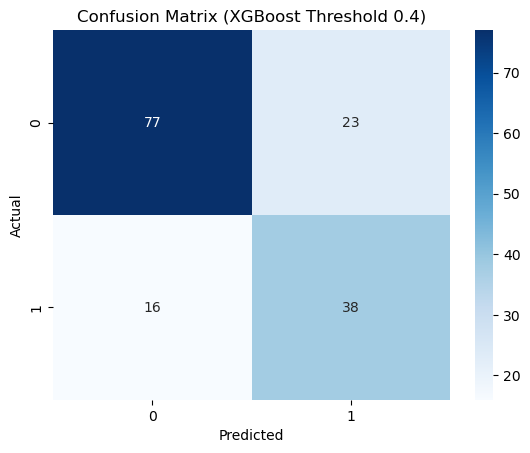

In [19]:

sns.heatmap(confusion_matrix(y_test, y_xgb_thresh), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (XGBoost Threshold 0.4)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
